***Folder Dividing***

In [37]:
import os
import shutil
source_folder = '/home/chuyenmt/git/DecodeItAll/Chuyen_explore/chasedb1'
output_folder = '/home/chuyenmt/git/DecodeItAll/Chuyen_explore/chasedb1_classified/image'
#output_folder = '/home/chuyenmt/git/DecodeItAll/Chuyen_explore/chasedb1_classified/1st_mark'
#output_folder = '/home/chuyenmt/git/DecodeItAll/Chuyen_explore/chasedb1_classified/2nd_mark'
for filename in os.listdir(source_folder): 
    file_prefix = filename[-7] 
    if file_prefix =='0':
        shutil.copy(os.path.join(source_folder, filename), os.path.join(output_folder))
print("Finished")

Finished hehe


***Train,test dividing***

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import numpy as np
import cv2
from PIL import Image
import torch
from torch import nn
from torch.optim import Adam
from torch.optim.lr_scheduler import CosineAnnealingLR
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import torchvision as tv
import torch.nn.functional as F
from torch import Tensor
from torch.utils.data import DataLoader
from torchvision import transforms


***Custorm Dataset***


In [31]:
train_img_dir = '/home/chuyenmt/git/DecodeItAll/Chuyen_explore/chasedb1_classified/image'
train_1st_mask_dir = '/home/chuyenmt/git/DecodeItAll/Chuyen_explore/chasedb1_classified/1st_mark'

In [11]:
class Chasedb(Dataset):
    def __init__(self, transform = None, target_transform = None):
        from glob import glob
        self.imgs = sorted(glob(train_img_dir + "/*"))
        self.msks = sorted(glob(train_1st_mask_dir + "/*"))
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.imgs)

    def __getitem__(self, idx):
        img_path = self.imgs[idx]
        msk_path = self.msks[idx]

        img = Image.open(img_path)
        msk = Image.open(msk_path)

        if self.transform:
            img = self.transform(img)

        if self.target_transform:
            msk = self.target_transform(msk)

        return (img, msk)

In [69]:
transform = transforms.Compose(
    [
        # transforms.Resize((256, 512)),
        #transforms.ToTensor(),
        #transforms.RandomResizedCrop(size=(224, 224), antialias=True),
        #transforms.RandomHorizontalFlip(p=0.5),
        #transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]), #của imgage net 
    ]
)

target_transform = transforms.Compose(
    [
        # transforms.Resize((256, 512)),
        transforms.ToTensor(),
    ]
)

Data_transfered = Chasedb(transform = transform, target_transform=target_transform)

print(len(Data_transfered))

18


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


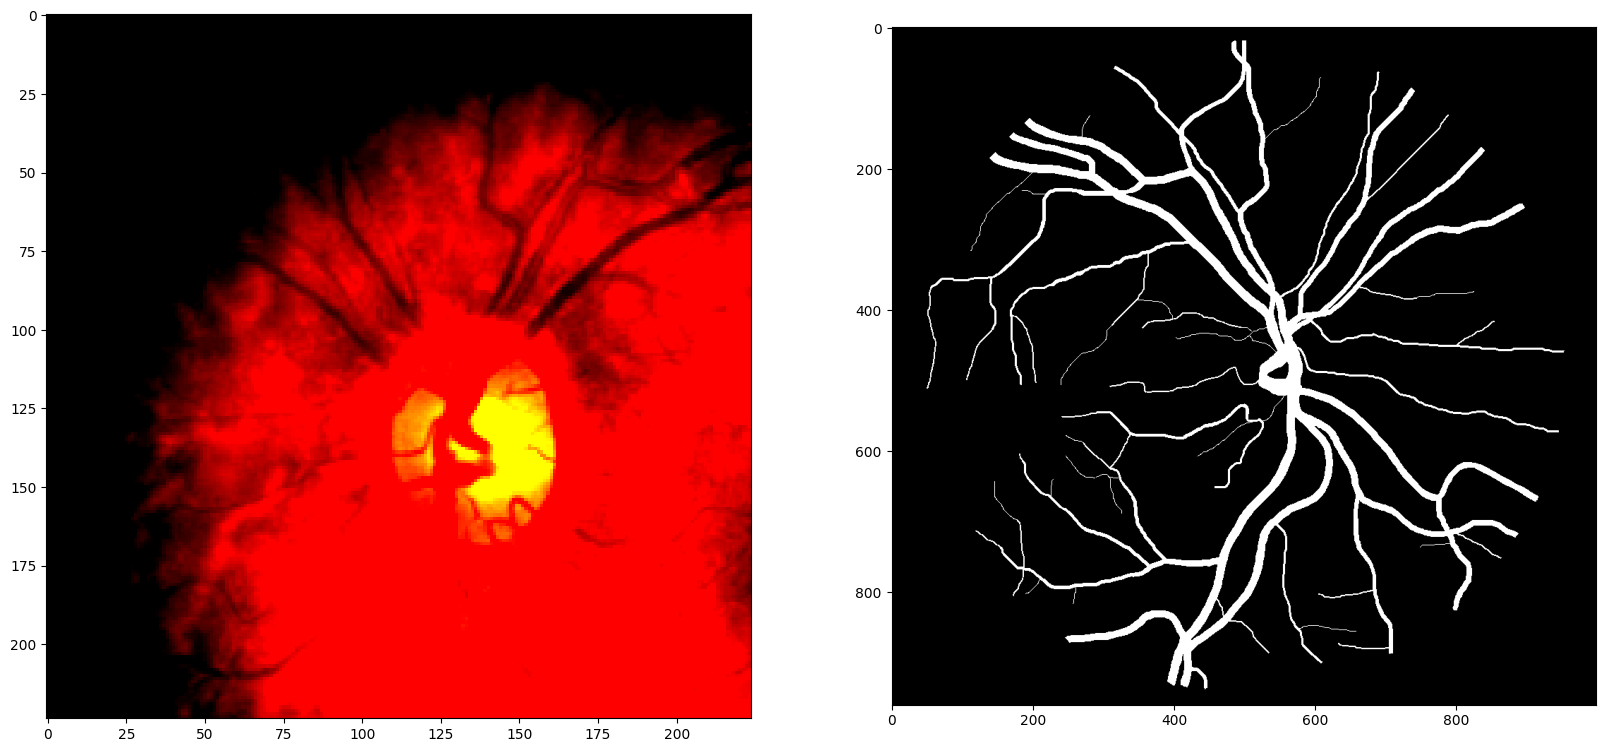

In [70]:

img, msk = Data_transfered[5]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 20)) #tạo một figure chứa hai axes (ax1 và ax2) được sắp xếp theo hàng ngang với kích thước 20x20 inches
ax1.imshow(img.permute(1, -1, 0).numpy()) #Phương thức permute(1, -1, 0) được sử dụng để thay đổi chiều của tensor ,.numpy() chuyển đổi tensor thành mảng NumPy
ax2.imshow(msk.permute(1, -1, 0).numpy(), cmap = 'gray')

In [37]:
Data_loaded = DataLoader(Data_transfered, batch_size=5, shuffle=True)

print(len(Data_loaded))
print(type(Data_loaded))

4
<class 'torch.utils.data.dataloader.DataLoader'>
